### Dialation, Erosion and Edge Detection

In [ ]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = "", image = None, size = 10):
  h,w = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(aspect_ratio * size, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# download & unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

*   **Dialation**: Adds pixels to the boundaries of the objects in an image.
*   **Erosion**: Removes pixels to the boundaries of the objects in an image.
*   **Opening**: Erosion followed by dialation.
*   **Closing**: Dialation followed by erosion.


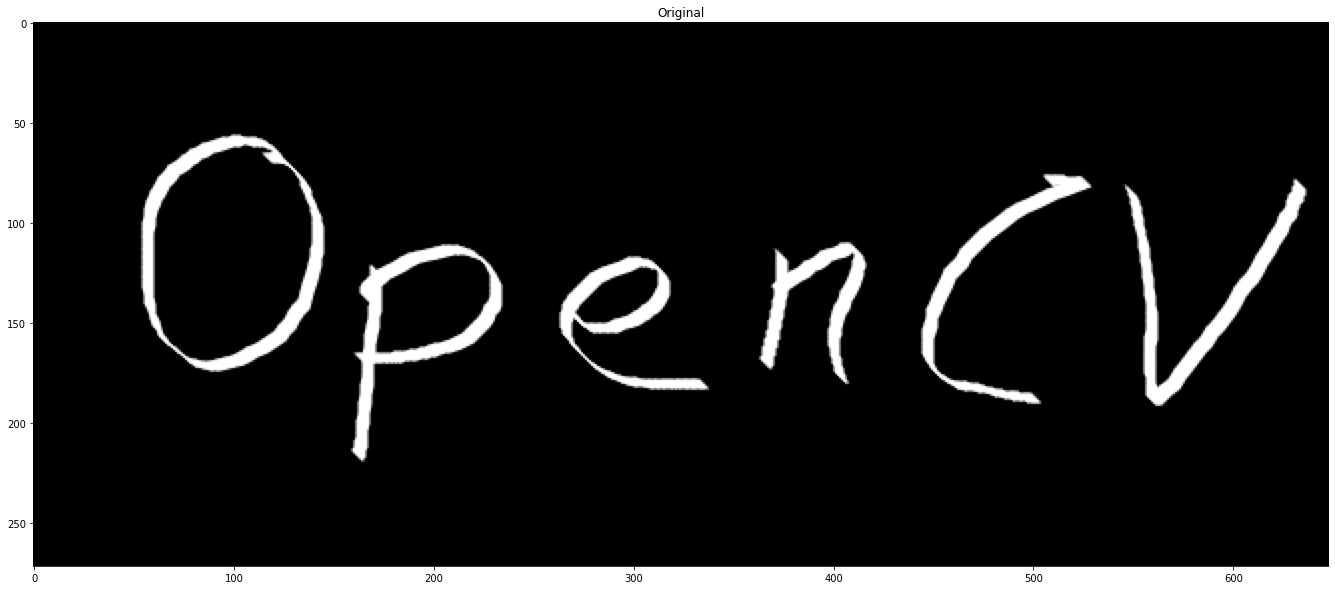

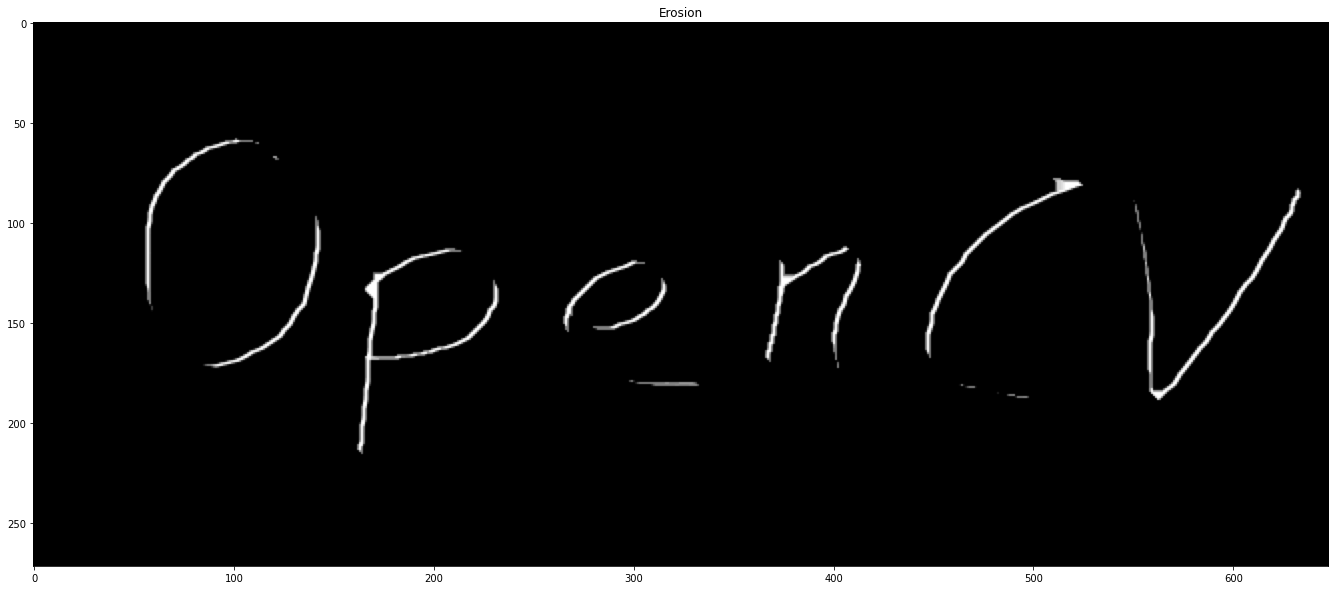

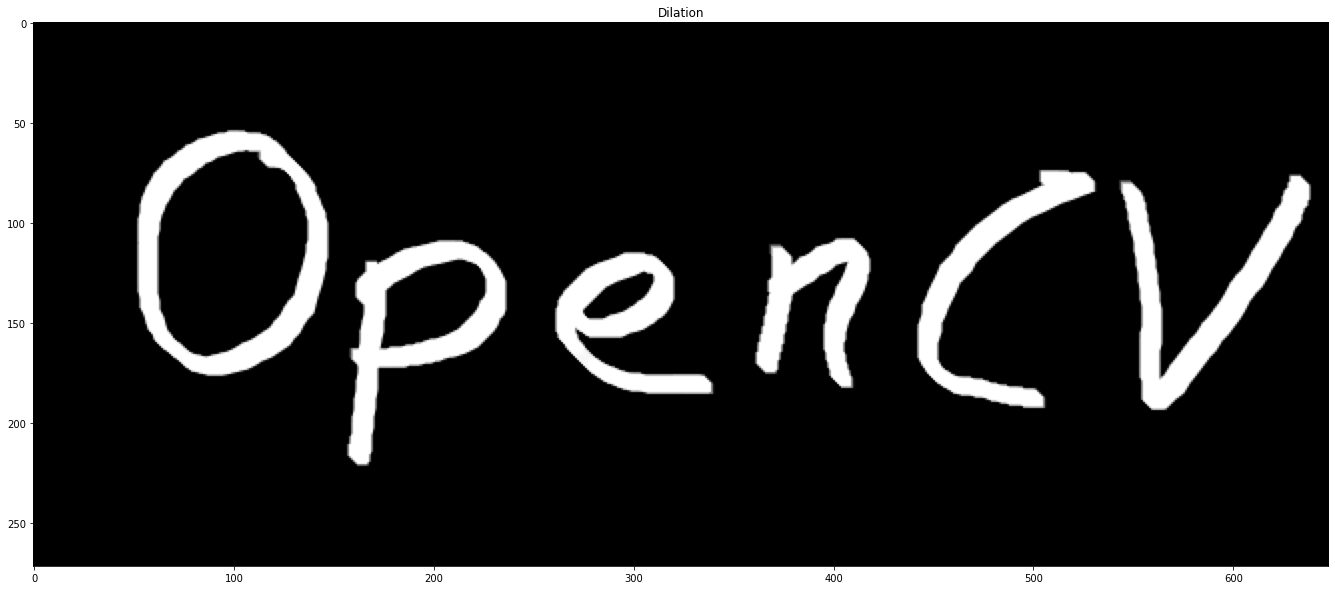

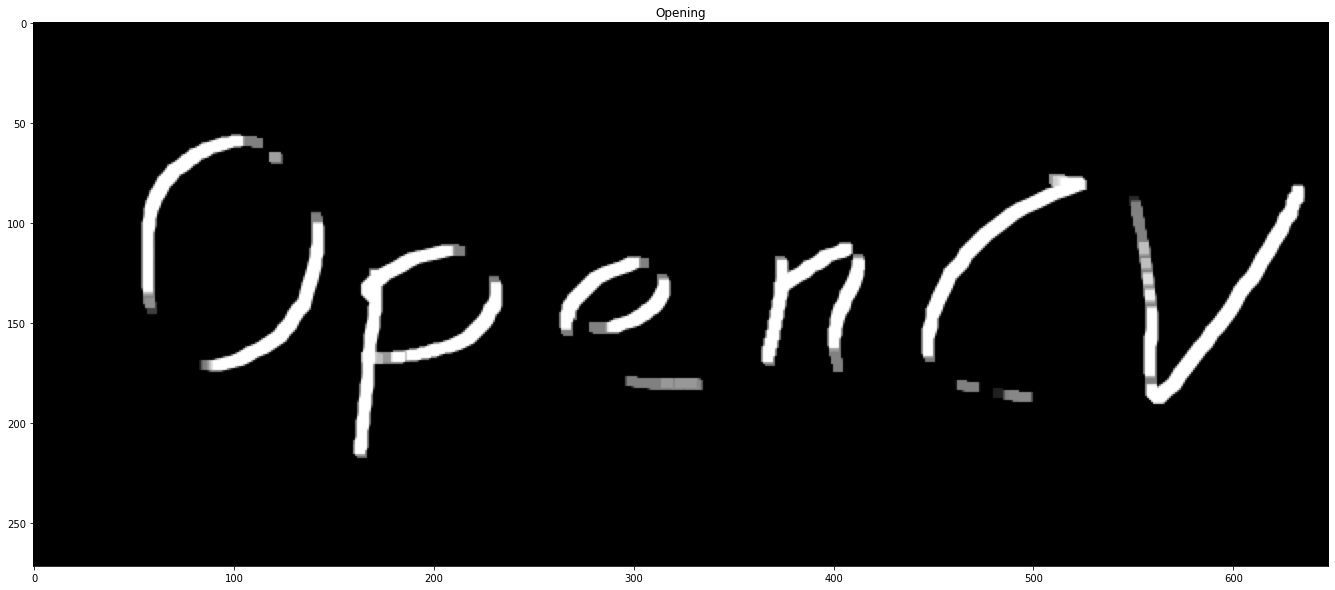

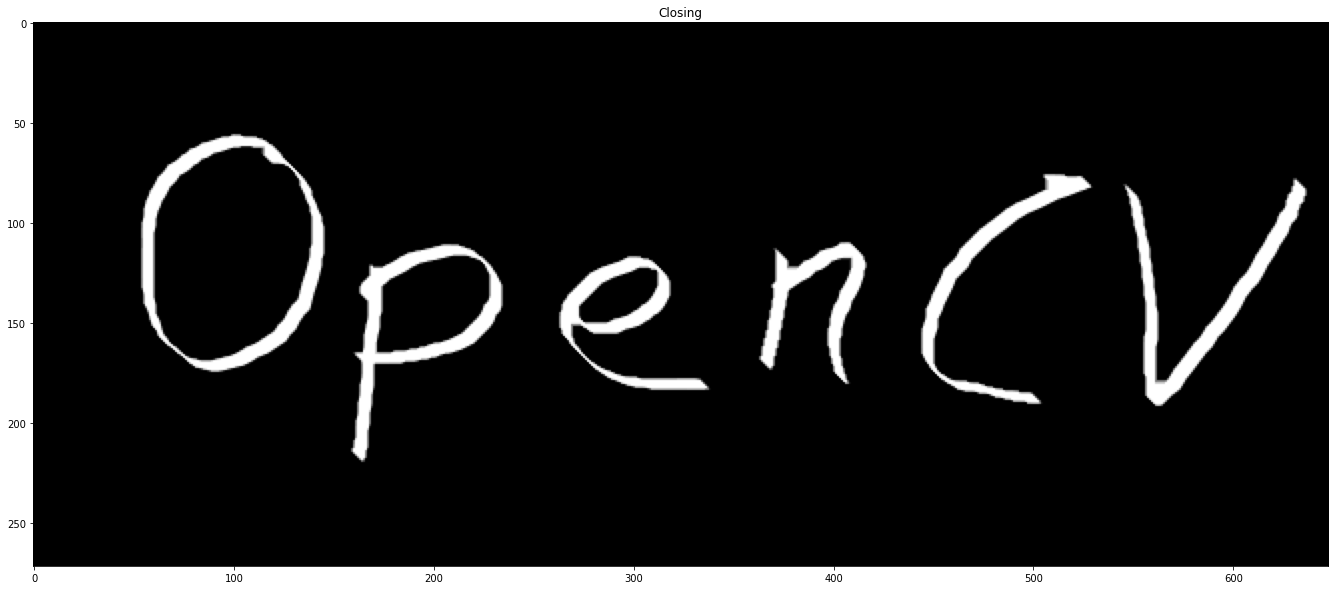

In [2]:
image = cv2.imread("/content/images/opencv_inv.png", 0)
imshow("Original", image)

# kernel size
kernel = np.ones((5,5), np.uint8)

# erosion
erode = cv2.erode(image, kernel, iterations=1)
imshow("Erosion", erode)

# dialation
dialation = cv2.dilate(image, kernel, iterations=1)
imshow("Dilation", dialation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow("Opening", opening)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow("Closing", closing)

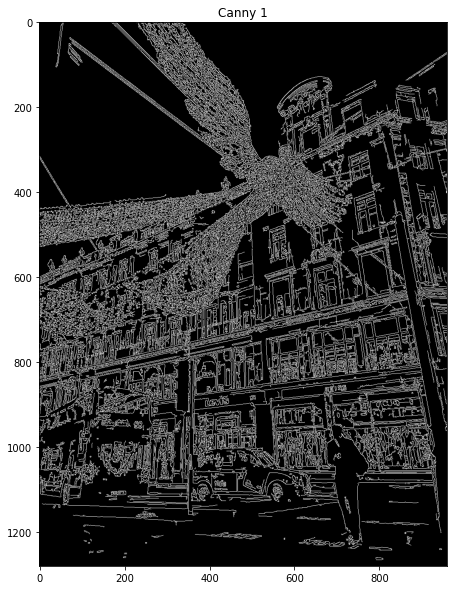

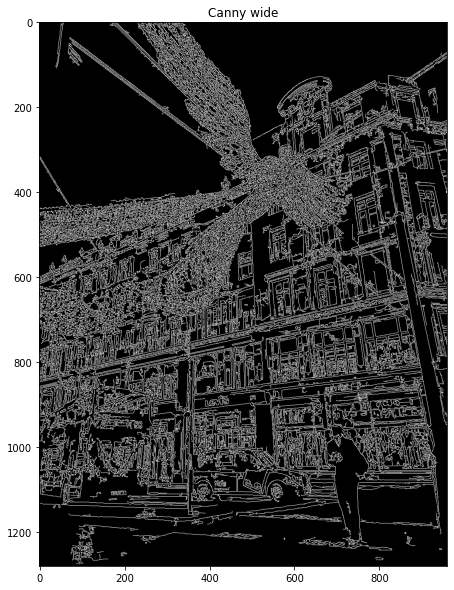

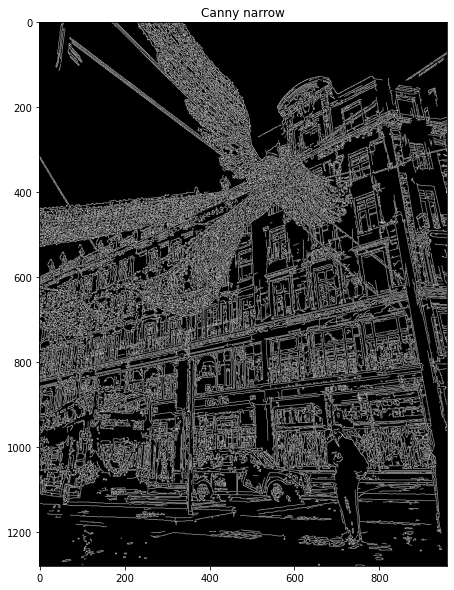

In [6]:
image = cv2.imread("/content/images/londonxmas.jpeg", 0)

canny = cv2.Canny(image, 60, 180)
imshow("Canny 1", canny)

# wide
canny1 = cv2.Canny(image, 10, 200)
imshow("Canny wide", canny1)

# narrow
canny2 = cv2.Canny(image, 50, 100)
imshow("Canny narrow", canny2)

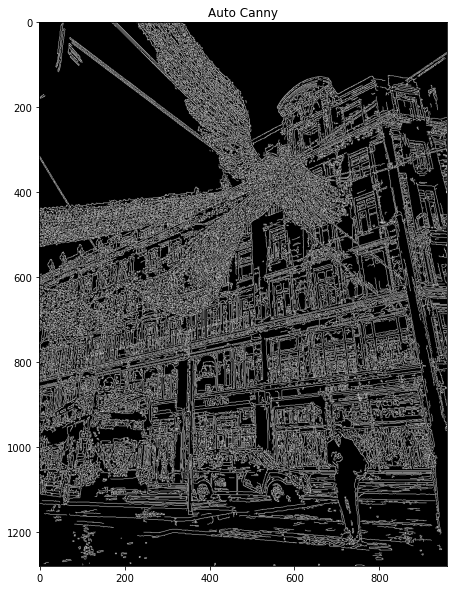

In [8]:
def auto_canny(image, sigma=0.33):
  # compute the median of the single channel pixel intensities
  v = np.median(image)

  # apply automatic Canny edge detection using the computed median
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  edged = cv2.Canny(image, lower, upper)

  # return the edged image
  return edged

edged = auto_canny(image)
imshow("Auto Canny", edged)